# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [625]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [626]:
sinasc_raw = pd.read_csv('./input/SINASC_RO_2019.csv')
sinasc_raw.head()

ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1        2        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
2        3        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
3        4        ATIVO      MUNIC  Alto Alegre dos Parecis  Rondônia   
4        5        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   

   munResLat munResLon  munResAlt  munResArea  
0  -11.93554 -61.99982      338.0    7067.025  
1  -11.93554 -61.99982      338.0    7067.025  
2  -11.93554 -61.99982      338.0    7067.025  
3  -12.13178 -61.85308      397.0    3958.273  
4  -11.93554 -61.99982      338.0    7067.025  

[5 rows x 69 columns]

In [627]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [628]:
sinasc_1 = sinasc_raw[['munResLat','munResNome', 'CONSULTAS', 'ESTCIVMAE', 'munResArea','IDADEMAE', 'DTNASC' ]].copy()

In [629]:
sinasc_2 = sinasc_1.copy()

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [630]:
sinasc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   munResLat   27027 non-null  float64
 1   munResNome  27028 non-null  object 
 2   CONSULTAS   27028 non-null  int64  
 3   ESTCIVMAE   26711 non-null  float64
 4   munResArea  27027 non-null  float64
 5   IDADEMAE    27028 non-null  int64  
 6   DTNASC      27028 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ MB


In [631]:
sinasc_1['munResLat'].sort_values(ascending=False)

23575    -8.76889
9755     -8.76889
9744     -8.76889
9745     -8.76889
9746     -8.76889
           ...   
25219   -13.49976
12356   -13.49976
25842   -13.49976
25490   -13.49976
1863          NaN
Name: munResLat, Length: 27028, dtype: float64

In [632]:
latitude = pd.cut(sinasc_1['munResLat'],[-13.49976, -10.5, -8.76889 ] )

* Soma

In [633]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='sum' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\1106673161.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='sum' )


CONSULTAS  ESTCIVMAE
munResLat                            
(-13.5, -10.5]       47690    32107.0
(-10.5, -8.769]      48662    35735.0

* Média

In [634]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='mean' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\968466424.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='mean' )


CONSULTAS  ESTCIVMAE
munResLat                            
(-13.5, -10.5]    3.693177   2.508555
(-10.5, -8.769]   3.467436   2.583689

* Mínimo

In [635]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='min' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2723161750.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='min' )


CONSULTAS  ESTCIVMAE
munResLat                            
(-13.5, -10.5]           1        1.0
(-10.5, -8.769]          1        1.0

* Máximo

In [636]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='max' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2807583464.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='max' )


CONSULTAS  ESTCIVMAE
munResLat                            
(-13.5, -10.5]           9        9.0
(-10.5, -8.769]          9        9.0

* Mediana

In [637]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc=np.median )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\394894267.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc=np.median )
C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\394894267.py:1: FutureWarning: The provided callable <function median at 0x000001A306B8F6A0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc=np.median )


CONSULTAS  ESTCIVMAE
munResLat                            
(-13.5, -10.5]         4.0        2.0
(-10.5, -8.769]        4.0        2.0

* Desvio padrão

In [638]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='std' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\4224986345.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='std' )


CONSULTAS  ESTCIVMAE
munResLat                            
(-13.5, -10.5]    0.644439   1.624233
(-10.5, -8.769]   0.888240   1.715163

* Variância

In [639]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='var' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\939037237.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= latitude, aggfunc='var' )


CONSULTAS  ESTCIVMAE
munResLat                            
(-13.5, -10.5]    0.415301   2.638132
(-10.5, -8.769]   0.788970   2.941785

In [640]:
sinasc_1.groupby(latitude)[['CONSULTAS', 'ESTCIVMAE']].mean()

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2533818865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_1.groupby(latitude)[['CONSULTAS', 'ESTCIVMAE']].mean()


CONSULTAS  ESTCIVMAE
munResLat                            
(-13.5, -10.5]    3.693177   2.508555
(-10.5, -8.769]   3.467436   2.583689

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [641]:
sinasc_1['munResArea'].sort_values(ascending=False)

6287     34096.394
6919     34096.394
6941     34096.394
6942     34096.394
6943     34096.394
           ...    
19290      459.978
19205      459.978
19293      459.978
5469       459.978
1863           NaN
Name: munResArea, Length: 27028, dtype: float64

In [642]:
area = pd.cut(sinasc_1['munResArea'], [459.978, 3000, 34096.394])

* Soma

In [643]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='sum' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\3510400604.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='sum' )


CONSULTAS  ESTCIVMAE
munResArea                               
(459.978, 3000.0]        19272    13168.0
(3000.0, 34096.394]      77142    54643.0

* Média

In [644]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='mean' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2040610341.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='mean' )


CONSULTAS  ESTCIVMAE
munResArea                               
(459.978, 3000.0]     3.738506   2.577412
(3000.0, 34096.394]   3.537326   2.537169

* Mínimo

In [645]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='min' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\3098063854.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='min' )


CONSULTAS  ESTCIVMAE
munResArea                               
(459.978, 3000.0]            1        1.0
(3000.0, 34096.394]          1        1.0

* Máximo

In [646]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='max' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\108359230.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='max' )


CONSULTAS  ESTCIVMAE
munResArea                               
(459.978, 3000.0]            9        9.0
(3000.0, 34096.394]          9        9.0

* Mediana

In [647]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc= np.median )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2534704930.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc= np.median )
C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2534704930.py:1: FutureWarning: The provided callable <function median at 0x000001A306B8F6A0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc= np.median )


CONSULTAS  ESTCIVMAE
munResArea                               
(459.978, 3000.0]          4.0        2.0
(3000.0, 34096.394]        4.0        2.0

* Desvio padrão

In [648]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='std' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2974976822.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='std' )


CONSULTAS  ESTCIVMAE
munResArea                               
(459.978, 3000.0]     0.608679   1.584270
(3000.0, 34096.394]   0.820967   1.691778

* Variância

In [649]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='var' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\1422992516.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area, aggfunc='var' )


CONSULTAS  ESTCIVMAE
munResArea                               
(459.978, 3000.0]     0.370490   2.509913
(3000.0, 34096.394]   0.673986   2.862114

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [650]:
area_metade = pd.qcut(sinasc_1['munResArea'], 2)
area_metade

0                 (6896.648, 34096.394]
1                 (6896.648, 34096.394]
2                 (6896.648, 34096.394]
3        (459.97700000000003, 6896.648]
4                 (6896.648, 34096.394]
                      ...              
27023             (6896.648, 34096.394]
27024    (459.97700000000003, 6896.648]
27025             (6896.648, 34096.394]
27026             (6896.648, 34096.394]
27027    (459.97700000000003, 6896.648]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(459.97700000000003, 6896.648] < (6896.648, 34096.394]]

* Soma

In [651]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='sum' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\1704115687.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='sum' )


CONSULTAS  ESTCIVMAE
munResArea                                          
(459.97700000000003, 6896.648]      53015    38062.0
(6896.648, 34096.394]               43647    29921.0

* Média

In [652]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='mean' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2503104435.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='mean' )


CONSULTAS  ESTCIVMAE
munResArea                                          
(459.97700000000003, 6896.648]   3.716699   2.699433
(6896.648, 34096.394]            3.419807   2.372799

* Mínimo

In [653]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='min' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\3965575761.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='min' )


CONSULTAS  ESTCIVMAE
munResArea                                          
(459.97700000000003, 6896.648]          1        1.0
(6896.648, 34096.394]                   1        1.0

* Máximo

In [654]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='max' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\3900837474.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='max' )


CONSULTAS  ESTCIVMAE
munResArea                                          
(459.97700000000003, 6896.648]          9        9.0
(6896.648, 34096.394]                   9        9.0

* Mediana

In [655]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc= np.median)

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\3915502554.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc= np.median)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\3915502554.py:1: FutureWarning: The provided callable <function median at 0x000001A306B8F6A0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc= np.median)


CONSULTAS  ESTCIVMAE
munResArea                                          
(459.97700000000003, 6896.648]        4.0        2.0
(6896.648, 34096.394]                 4.0        2.0

* Desvio padrão

In [656]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='std' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2032236645.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='std' )


CONSULTAS  ESTCIVMAE
munResArea                                          
(459.97700000000003, 6896.648]   0.612690   1.660705
(6896.648, 34096.394]            0.921996   1.666131

* Variância

In [657]:
sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='var' )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\420405724.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(values= ['CONSULTAS', 'ESTCIVMAE'], index= area_metade, aggfunc='var' )


CONSULTAS  ESTCIVMAE
munResArea                                          
(459.97700000000003, 6896.648]   0.375390   2.757940
(6896.648, 34096.394]            0.850076   2.775991

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [658]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}
set(imediatas.values())

{'Ariquemes', 'Cacoal', 'Jaru', 'Ji-Paraná', 'Porto Velho', 'Vilhena'}

In [659]:
sinasc_1.loc[:,'DTNASC'] = pd.to_datetime(sinasc_1['DTNASC'])

In [660]:
sinasc_2 = sinasc_2.set_index('munResNome')

<Axes: xlabel='munResNome'>

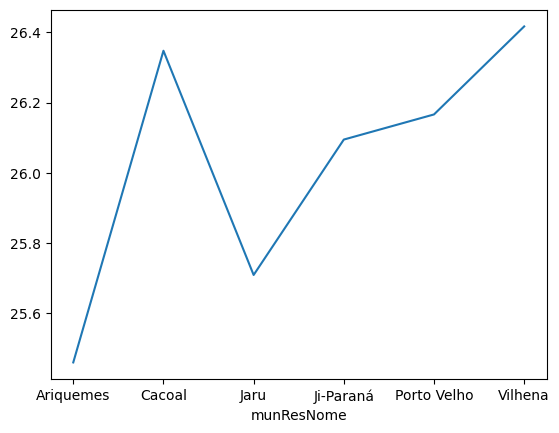

In [661]:
sinasc_2.groupby(imediatas)['IDADEMAE'].mean().plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [662]:
lista_idh_alto = ['Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim Moura']
lista_idh_medio = ["Cerejeiras", 
"Jaru", 
"Colorado do Oeste", 
"Ouro Preto do Oeste",
"Espigão d'Oeste",
"Santa Luzia d'Oeste", 
"Pimenteiras do Oeste",
"Presidente Médici", 
"Castanheiras", 
"Guajará-Mirim", 
"Chupinguaia", 
"Cabixi", 
"Candeias do Jamari", 
"São Felipe d'Oeste", 
"Cacaulândia", 
"São Miguel do Guaporé", 
"Mirante da Serra", 
"Alvorada d'Oeste", 
"Teixeirópolis", 
"Nova Brasilândia d'Oeste", 
"Rio Crespo", 
"Primavera de Rondônia", 
"Alta Floresta d'Oeste", 
"Ministro Andreazza", 
"Novo Horizonte do Oeste", 
"Vale do Paraíso", 
"Alto Paraíso", 
"Parecis", 
"Buritis", 
"Itapuã do Oeste", 
"Corumbiara", 
"Cujubim", 
"Costa Marques", 
"São Francisco do Guaporé", 
"Urupá", 
"Monte Negro"
]

dicionario_idh = {chave: 'IDH-M Alto' for chave in lista_idh_alto}    
dicionario_idh.update({chave: 'IDH-M Médio' for chave in lista_idh_medio} )  

In [663]:
sinasc_2.groupby(dicionario_idh)['ESTCIVMAE'].mean().to_frame()

ESTCIVMAE
munResNome            
IDH-M Alto    2.566450
IDH-M Médio   2.494302

In [664]:
sinasc_1['IDH_MUNICIPIO'] = 'IDH-M Baixo'
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_idh_alto), 'IDH_MUNICIPIO'] = 'IDH-M Alto'
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_idh_medio), 'IDH_MUNICIPIO'] = 'IDH-M Médio'

In [665]:
sinasc_1.loc[sinasc_1['IDH_MUNICIPIO'] == 'IDH-M Alto']

munResLat munResNome  CONSULTAS  ESTCIVMAE  munResArea  IDADEMAE  \
72      -9.90846  Ariquemes          4        2.0    4426.571        29   
74      -9.90846  Ariquemes          4        2.0    4426.571        35   
76      -9.90846  Ariquemes          4        1.0    4426.571        26   
79      -9.90846  Ariquemes          4        5.0    4426.571        24   
80      -9.90846  Ariquemes          4        2.0    4426.571        25   
...          ...        ...        ...        ...         ...       ...   
27020  -12.74137    Vilhena          4        2.0   11518.915        34   
27022  -12.74137    Vilhena          4        2.0   11518.915        34   
27023  -12.74137    Vilhena          4        2.0   11518.915        32   
27025  -12.74137    Vilhena          4        2.0   11518.915        24   
27026  -12.74137    Vilhena          4        2.0   11518.915        21   

                    DTNASC IDH_MUNICIPIO  
72     2019-01-16 00:00:00    IDH-M Alto  
74     2019-01-02 00:00:00    IDH-M Alto  
76     2019-01-15 00:00:00    IDH-M Alto  
79     2019-01-10 00:00:00    IDH-M Alto  
80     2019-01-10 00:00:00    IDH-M Alto  
...                    ...           ...  
27020  2019-11-09 00:00:00    IDH-M Alto  
27022  2019-11-21 00:00:00    IDH-M Alto  
27023  2019-12-13 00:00:00    IDH-M Alto  
27025  2019-08-02 00:00:00    IDH-M Alto  
27026  2019-12-23 00:00:00    IDH-M Alto  

[15928 rows x 8 columns]

In [666]:

sinasc_1['IDH_MUNICIPIO'] = sinasc_1.loc[sinasc_1['IDH_MUNICIPIO'] == 'IDH-M baixo', 'IDH_MUNICIPIO'] = 1
sinasc_1['IDH_MUNICIPIO'] = sinasc_1.loc[sinasc_1['IDH_MUNICIPIO'] == 'IDH-M médio', 'IDH_MUNICIPIO'] = 2
sinasc_1['IDH_MUNICIPIO'] = sinasc_1.loc[sinasc_1['IDH_MUNICIPIO'] == 'IDH-M alto', 'IDH_MUNICIPIO'] = 3
sinasc_1

munResLat               munResNome  CONSULTAS  ESTCIVMAE  munResArea  \
0      -11.93554    Alta Floresta D'Oeste          4        5.0    7067.025   
1      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
2      -11.93554    Alta Floresta D'Oeste          4        9.0    7067.025   
3      -12.13178  Alto Alegre dos Parecis          3        5.0    3958.273   
4      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
...          ...                      ...        ...        ...         ...   
27023  -12.74137                  Vilhena          4        2.0   11518.915   
27024  -12.55684              Chupinguaia          4        1.0    5126.723   
27025  -12.74137                  Vilhena          4        2.0   11518.915   
27026  -12.74137                  Vilhena          4        2.0   11518.915   
27027  -11.70974  Novo Horizonte do Oeste          4        5.0     843.446   

       IDADEMAE               DTNASC  IDH_MUNICIPIO  
0            19  2019-02-19 00:00:00              3  
1            29  2019-02-21 00:00:00              3  
2            37  2019-02-25 00:00:00              3  
3            30  2019-03-20 00:00:00              3  
4            30  2019-03-23 00:00:00              3  
...         ...                  ...            ...  
27023        32  2019-12-13 00:00:00              3  
27024        19  2019-10-04 00:00:00              3  
27025        24  2019-08-02 00:00:00              3  
27026        21  2019-12-23 00:00:00              3  
27027        18  2019-12-27 00:00:00              3  

[27028 rows x 8 columns]

In [667]:
sinasc_1['IDH_MUNICIPIO'] = sinasc_1['IDH_MUNICIPIO'].astype(int)
sinasc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   munResLat      27027 non-null  float64
 1   munResNome     27028 non-null  object 
 2   CONSULTAS      27028 non-null  int64  
 3   ESTCIVMAE      26711 non-null  float64
 4   munResArea     27027 non-null  float64
 5   IDADEMAE       27028 non-null  int64  
 6   DTNASC         27028 non-null  object 
 7   IDH_MUNICIPIO  27028 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 1.5+ MB


In [668]:
idh = pd.cut(sinasc_1['IDH_MUNICIPIO'], bins=[0, 1, 2, 3], labels= ['IDH-M baixo', 'IDH-M médio', 'IDH-M alto'])
sinasc_1['IDH_CATEGORIA'] = idh
sinasc_1

munResLat               munResNome  CONSULTAS  ESTCIVMAE  munResArea  \
0      -11.93554    Alta Floresta D'Oeste          4        5.0    7067.025   
1      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
2      -11.93554    Alta Floresta D'Oeste          4        9.0    7067.025   
3      -12.13178  Alto Alegre dos Parecis          3        5.0    3958.273   
4      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
...          ...                      ...        ...        ...         ...   
27023  -12.74137                  Vilhena          4        2.0   11518.915   
27024  -12.55684              Chupinguaia          4        1.0    5126.723   
27025  -12.74137                  Vilhena          4        2.0   11518.915   
27026  -12.74137                  Vilhena          4        2.0   11518.915   
27027  -11.70974  Novo Horizonte do Oeste          4        5.0     843.446   

       IDADEMAE               DTNASC  IDH_MUNICIPIO IDH_CATEGORIA  
0            19  2019-02-19 00:00:00              3    IDH-M alto  
1            29  2019-02-21 00:00:00              3    IDH-M alto  
2            37  2019-02-25 00:00:00              3    IDH-M alto  
3            30  2019-03-20 00:00:00              3    IDH-M alto  
4            30  2019-03-23 00:00:00              3    IDH-M alto  
...         ...                  ...            ...           ...  
27023        32  2019-12-13 00:00:00              3    IDH-M alto  
27024        19  2019-10-04 00:00:00              3    IDH-M alto  
27025        24  2019-08-02 00:00:00              3    IDH-M alto  
27026        21  2019-12-23 00:00:00              3    IDH-M alto  
27027        18  2019-12-27 00:00:00              3    IDH-M alto  

[27028 rows x 9 columns]

In [669]:
sinasc_1.pivot_table(index= idh, values= ['CONSULTAS','ESTCIVMAE'], aggfunc='sum')

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\943462338.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(index= idh, values= ['CONSULTAS','ESTCIVMAE'], aggfunc='sum')


CONSULTAS  ESTCIVMAE
IDH_MUNICIPIO                      
IDH-M baixo            0        0.0
IDH-M médio            0        0.0
IDH-M alto         96663    67988.0

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [670]:
lista_ifdm_moderados = ["Ariquemes",
"Vilhena",
"Pimenta Bueno",
"Porto Velho",
"Ji-Paraná",
"Cacoal",
"Santa Luzia D'Oeste",
"Rolim de Moura",
"Chupinguaia",
"São Miguel do Guaporé",
"Pimenteiras do Oeste",
"Teixeirópolis",
"Colorado do Oeste",
"Jaru",
"Rio Crespo",
"Primavera de Rondônia",
"Alta Floresta D'Oeste",
"Ouro Preto do Oeste",
"São Francisco do Guaporé",
"Candeias do Jamari",
"Buritis",
"São Felipe D'Oeste",
"Presidente Médici",
"Cerejeiras",
"Monte Negro",
"Urupá",
]

lista_ifdm_regular = ["Espigão D'Oeste",
"Seringueiras",
"Alvorada D'Oeste",
"Itapuã do Oeste",
"Cabixi",
"Novo Horizonte do Oeste",
"Nova Brasilândia D'Oeste",
"Vale do Paraíso",
"Corumbiara",
"Alto Paraíso",
"Cacaulândia",
"Vale do Anari",
"Ministro Andreazza",
"Costa Marques",
"Nova União",
"Guajará-Mirim",
"Mirante da Serra",
"Parecis",
"Castanheiras",
"Theobroma",
"Machadinho D'Oeste",
"Campo Novo de Rondônia",
"Nova Mamoré",
"Cujubim",
"Alto Alegre dos Parecis",
"Governador Jorge Teixeira",
]

dicionario_ifdm = {chave: 'Desenvolvimento Regular' for chave in lista_ifdm_regular}
dicionario_ifdm.update({chave: 'Desenvolvimento Moderado' for chave in lista_ifdm_moderados})

dicionario_ifdm

{"Espigão D'Oeste": 'Desenvolvimento Regular',
 'Seringueiras': 'Desenvolvimento Regular',
 "Alvorada D'Oeste": 'Desenvolvimento Regular',
 'Itapuã do Oeste': 'Desenvolvimento Regular',
 'Cabixi': 'Desenvolvimento Regular',
 'Novo Horizonte do Oeste': 'Desenvolvimento Regular',
 "Nova Brasilândia D'Oeste": 'Desenvolvimento Regular',
 'Vale do Paraíso': 'Desenvolvimento Regular',
 'Corumbiara': 'Desenvolvimento Regular',
 'Alto Paraíso': 'Desenvolvimento Regular',
 'Cacaulândia': 'Desenvolvimento Regular',
 'Vale do Anari': 'Desenvolvimento Regular',
 'Ministro Andreazza': 'Desenvolvimento Regular',
 'Costa Marques': 'Desenvolvimento Regular',
 'Nova União': 'Desenvolvimento Regular',
 'Guajará-Mirim': 'Desenvolvimento Regular',
 'Mirante da Serra': 'Desenvolvimento Regular',
 'Parecis': 'Desenvolvimento Regular',
 'Castanheiras': 'Desenvolvimento Regular',
 'Theobroma': 'Desenvolvimento Regular',
 "Machadinho D'Oeste": 'Desenvolvimento Regular',
 'Campo Novo de Rondônia': 'Desenvolvime

In [671]:
sinasc_1

munResLat               munResNome  CONSULTAS  ESTCIVMAE  munResArea  \
0      -11.93554    Alta Floresta D'Oeste          4        5.0    7067.025   
1      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
2      -11.93554    Alta Floresta D'Oeste          4        9.0    7067.025   
3      -12.13178  Alto Alegre dos Parecis          3        5.0    3958.273   
4      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
...          ...                      ...        ...        ...         ...   
27023  -12.74137                  Vilhena          4        2.0   11518.915   
27024  -12.55684              Chupinguaia          4        1.0    5126.723   
27025  -12.74137                  Vilhena          4        2.0   11518.915   
27026  -12.74137                  Vilhena          4        2.0   11518.915   
27027  -11.70974  Novo Horizonte do Oeste          4        5.0     843.446   

       IDADEMAE               DTNASC  IDH_MUNICIPIO IDH_CATEGORIA  
0            19  2019-02-19 00:00:00              3    IDH-M alto  
1            29  2019-02-21 00:00:00              3    IDH-M alto  
2            37  2019-02-25 00:00:00              3    IDH-M alto  
3            30  2019-03-20 00:00:00              3    IDH-M alto  
4            30  2019-03-23 00:00:00              3    IDH-M alto  
...         ...                  ...            ...           ...  
27023        32  2019-12-13 00:00:00              3    IDH-M alto  
27024        19  2019-10-04 00:00:00              3    IDH-M alto  
27025        24  2019-08-02 00:00:00              3    IDH-M alto  
27026        21  2019-12-23 00:00:00              3    IDH-M alto  
27027        18  2019-12-27 00:00:00              3    IDH-M alto  

[27028 rows x 9 columns]

In [672]:
sinasc_2.groupby(dicionario_ifdm)[['CONSULTAS','ESTCIVMAE']].count()

CONSULTAS  ESTCIVMAE
munResNome                                    
Desenvolvimento Moderado      21946      21690
Desenvolvimento Regular        5081       5020

In [673]:
sinasc_1['IFDM_MUNICIPIO'] = 0
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_ifdm_moderados), 'IFDM_MUNICIPIO'] = 3
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_ifdm_regular), 'IFDM_MUNICIPIO'] = 2
sinasc_1.loc[sinasc_1['IFDM_MUNICIPIO'] == 0]

munResLat               munResNome  CONSULTAS  ESTCIVMAE  munResArea  \
1863        NaN  Município ignorado - RO          1        5.0         NaN   

      IDADEMAE               DTNASC  IDH_MUNICIPIO IDH_CATEGORIA  \
1863        24  2019-04-03 00:00:00              3    IDH-M alto   

      IFDM_MUNICIPIO  
1863               0

In [674]:
ifdm = pd.cut(sinasc_1['IFDM_MUNICIPIO'], bins=[0,1,2,3,4], labels= ['Desenvolvimento baixo', 'Desenvolvimento regular', 'Desenvolvimento moderado', 'Desenvolvimento alto'])
sinasc_1['IFDM_CATEGORIA'] = ifdm
sinasc_1

munResLat               munResNome  CONSULTAS  ESTCIVMAE  munResArea  \
0      -11.93554    Alta Floresta D'Oeste          4        5.0    7067.025   
1      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
2      -11.93554    Alta Floresta D'Oeste          4        9.0    7067.025   
3      -12.13178  Alto Alegre dos Parecis          3        5.0    3958.273   
4      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
...          ...                      ...        ...        ...         ...   
27023  -12.74137                  Vilhena          4        2.0   11518.915   
27024  -12.55684              Chupinguaia          4        1.0    5126.723   
27025  -12.74137                  Vilhena          4        2.0   11518.915   
27026  -12.74137                  Vilhena          4        2.0   11518.915   
27027  -11.70974  Novo Horizonte do Oeste          4        5.0     843.446   

       IDADEMAE               DTNASC  IDH_MUNICIPIO IDH_CATEGORIA  \
0            19  2019-02-19 00:00:00              3    IDH-M alto   
1            29  2019-02-21 00:00:00              3    IDH-M alto   
2            37  2019-02-25 00:00:00              3    IDH-M alto   
3            30  2019-03-20 00:00:00              3    IDH-M alto   
4            30  2019-03-23 00:00:00              3    IDH-M alto   
...         ...                  ...            ...           ...   
27023        32  2019-12-13 00:00:00              3    IDH-M alto   
27024        19  2019-10-04 00:00:00              3    IDH-M alto   
27025        24  2019-08-02 00:00:00              3    IDH-M alto   
27026        21  2019-12-23 00:00:00              3    IDH-M alto   
27027        18  2019-12-27 00:00:00              3    IDH-M alto   

       IFDM_MUNICIPIO            IFDM_CATEGORIA  
0                   3  Desenvolvimento moderado  
1                   3  Desenvolvimento moderado  
2                   3  Desenvolvimento moderado  
3                   2   Desenvolvimento regular  
4                   3  Desenvolvimento moderado  
...               ...                       ...  
27023               3  Desenvolvimento moderado  
27024               3  Desenvolvimento moderado  
27025               3  Desenvolvimento moderado  
27026               3  Desenvolvimento moderado  
27027               2   Desenvolvimento regular  

[27028 rows x 11 columns]

In [675]:
sinasc_1.pivot_table(index=ifdm, values=['CONSULTAS', 'ESTCIVMAE'], aggfunc='mean')

C:\Users\hfasa\AppData\Local\Temp\ipykernel_20888\2377294348.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_1.pivot_table(index=ifdm, values=['CONSULTAS', 'ESTCIVMAE'], aggfunc='mean')


CONSULTAS  ESTCIVMAE
IFDM_MUNICIPIO                                
Desenvolvimento regular    3.583743   2.425896
Desenvolvimento moderado   3.574820   2.572845

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [676]:
sinasc_2

munResLat  CONSULTAS  ESTCIVMAE  munResArea  \
munResNome                                                             
Alta Floresta D'Oeste    -11.93554          4        5.0    7067.025   
Alta Floresta D'Oeste    -11.93554          4        2.0    7067.025   
Alta Floresta D'Oeste    -11.93554          4        9.0    7067.025   
Alto Alegre dos Parecis  -12.13178          3        5.0    3958.273   
Alta Floresta D'Oeste    -11.93554          4        2.0    7067.025   
...                            ...        ...        ...         ...   
Vilhena                  -12.74137          4        2.0   11518.915   
Chupinguaia              -12.55684          4        1.0    5126.723   
Vilhena                  -12.74137          4        2.0   11518.915   
Vilhena                  -12.74137          4        2.0   11518.915   
Novo Horizonte do Oeste  -11.70974          4        5.0     843.446   

                         IDADEMAE      DTNASC  
munResNome                                     
Alta Floresta D'Oeste          19  2019-02-19  
Alta Floresta D'Oeste          29  2019-02-21  
Alta Floresta D'Oeste          37  2019-02-25  
Alto Alegre dos Parecis        30  2019-03-20  
Alta Floresta D'Oeste          30  2019-03-23  
...                           ...         ...  
Vilhena                        32  2019-12-13  
Chupinguaia                    19  2019-10-04  
Vilhena                        24  2019-08-02  
Vilhena                        21  2019-12-23  
Novo Horizonte do Oeste        18  2019-12-27  

[27028 rows x 6 columns]

In [677]:
dicionario_pib = {"Porto Velho": 'acima de 1 bilhão',
"Ji-Paraná": 'acima de 1 bilhão',
"Vilhena": 'acima de 1 bilhão',
"Ariquemes": 'acima de 1 bilhão',
"Cacoal": 'acima de 1 bilhão',
"Jaru": 'acima de 1 bilhão',
"Rolim de Moura": 'acima de 1 bilhão',
"Pimenta Bueno": 'acima de 1 bilhão',
"Guajará-Mirim": 'acima de 500 milhões',
"Ouro Preto do Oeste": 'acima de 500 milhões',
"Buritis": 'acima de 500 milhões',
"Machadinho do Oeste": 'acima de 500 milhões',
"Espigão d'Oeste": 'acima de 500 milhões',
"São Miguel do Guaporé": 'acima de 500 milhões',
"Candeias do Jamari": 'acima de 500 milhões',
"Nova Mamoré": 'acima de 500 milhões',
"Cerejeiras": 'acima de 500 milhões',
"Alta Floresta do Oeste": 'acima de 300 milhões',
"Presidente Médici": 'acima de 300 milhões',
"Cujubim": 'acima de 300 milhões',
"Nova Brasilândia do Oeste": 'acima de 300 milhões',
"Alto Paraíso": 'acima de 300 milhões',
"São Francisco do Guaporé": 'acima de 300 milhões',
"Colorado do Oeste": 'acima de 300 milhões',
"Monte Negro": 'acima de 200 milhões',
"Alto Alegre dos Parecis": 'acima de 200 milhões',
"Campo Novo de Rondônia": 'acima de 200 milhões',
"Alvorada do Oeste": 'acima de 200 milhões',
"Chupinguaia": 'acima de 100 milhões',
"Corumbiara": 'acima de 100 milhões',
"Ministro Andreazza": 'acima de 100 milhões',
"Urupá": 'acima de 100 milhões',
"Costa Marques": 'acima de 100 milhões',
"Seringueiras": 'acima de 100 milhões',
"Mirante da Serra": 'acima de 100 milhões',
"Governador Jorge Teixeira": 'acima de 100 milhões',
"Theobroma": 'acima de 100 milhões',
"Santa Luzia do Oeste": 'acima de 100 milhões',
"Novo Horizonte do Oeste": 'acima de 100 milhões',
"Itapuã do Oeste": 'acima de 100 milhões',
"Vale do Paraíso": 'acima de 100 milhões',
"Cacaulândia": 'acima de 100 milhões',
"Cabixi": 'acima de 100 milhões',
"Vale do Anari": 'acima de 100 milhões',
"Nova União": 'até 100 milhões',
"Parecis": 'até 100 milhões',
"Rio Crespo": 'até 100 milhões',
"Pimenteiras do Oeste": 'até 100 milhões',
"Teixeirópolis": 'até 100 milhões',
"São Felipe do Oeste": 'até 100 milhões',
"Castanheiras": 'até 100 milhões',
"Primavera de Rondônia": 'até 100 milhões',
}

lista_pib_acima_de_1_bilhao = ["Porto Velho",
"Ji-Paraná",
"Vilhena",
"Ariquemes",
"Cacoal",
"Jaru",
"Rolim de Moura",
"Pimenta Bueno",
]

lista_pib_acima_de_500_milhoes = ["Guajará-Mirim",
"Ouro Preto do Oeste",
"Buritis",
"Machadinho do Oeste",
"Espigão d'Oeste",
"São Miguel do Guaporé",
"Candeias do Jamari",
"Nova Mamoré",
"Cerejeiras",
]

lista_pib_acima_de_300_milhoes = ["Alta Floresta do Oeste",
"Presidente Médici",
"Cujubim",
"Nova Brasilândia do Oeste",
"Alto Paraíso",
"São Francisco do Guaporé",
"Colorado do Oeste",
]

lista_pib_acima_de_200_milhoes = ["Monte Negro",
"Alto Alegre dos Parecis",
"Campo Novo de Rondônia",
"Alvorada do Oeste",
]

lista_pib_acima_de_100_milhoes = ["Chupinguaia",
"Corumbiara",
"Ministro Andreazza",
"Urupá",
"Costa Marques",
"Seringueiras",
"Mirante da Serra",
"Governador Jorge Teixeira",
"Theobroma",
"Santa Luzia do Oeste",
"Novo Horizonte do Oeste",
"Itapuã do Oeste",
"Vale do Paraíso",
"Cacaulândia",
"Cabixi",
"Vale do Anari",
]

lista_pib_acima_até_100_milhoes = ["Nova União",
"Parecis",
"Rio Crespo",
"Pimenteiras do Oeste",
"Teixeirópolis",
"São Felipe do Oeste",
"Castanheiras",
"Primavera de Rondônia",
]

In [678]:
sinasc_1['PIB_MUNICIPIO'] = 'até 100 milhões'
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_pib_acima_de_1_bilhao), 'PIB_MUNICIPIO'] = 'acima de 1 bilhão'
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_pib_acima_de_500_milhoes), 'PIB_MUNICIPIO'] = 'acima de 500 milhões'
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_pib_acima_de_300_milhoes), 'PIB_MUNICIPIO'] = 'acima de 300 milhões'
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_pib_acima_de_200_milhoes), 'PIB_MUNICIPIO'] = 'acima de 200 milhões'
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_pib_acima_de_100_milhoes), 'PIB_MUNICIPIO'] = 'acima de 100 milhões'
sinasc_1.loc[sinasc_1['munResNome'].isin(lista_pib_acima_até_100_milhoes), 'PIB_MUNICIPIO'] = 'até 100 milhões'
sinasc_1

munResLat               munResNome  CONSULTAS  ESTCIVMAE  munResArea  \
0      -11.93554    Alta Floresta D'Oeste          4        5.0    7067.025   
1      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
2      -11.93554    Alta Floresta D'Oeste          4        9.0    7067.025   
3      -12.13178  Alto Alegre dos Parecis          3        5.0    3958.273   
4      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
...          ...                      ...        ...        ...         ...   
27023  -12.74137                  Vilhena          4        2.0   11518.915   
27024  -12.55684              Chupinguaia          4        1.0    5126.723   
27025  -12.74137                  Vilhena          4        2.0   11518.915   
27026  -12.74137                  Vilhena          4        2.0   11518.915   
27027  -11.70974  Novo Horizonte do Oeste          4        5.0     843.446   

       IDADEMAE               DTNASC  IDH_MUNICIPIO IDH_CATEGORIA  \
0            19  2019-02-19 00:00:00              3    IDH-M alto   
1            29  2019-02-21 00:00:00              3    IDH-M alto   
2            37  2019-02-25 00:00:00              3    IDH-M alto   
3            30  2019-03-20 00:00:00              3    IDH-M alto   
4            30  2019-03-23 00:00:00              3    IDH-M alto   
...         ...                  ...            ...           ...   
27023        32  2019-12-13 00:00:00              3    IDH-M alto   
27024        19  2019-10-04 00:00:00              3    IDH-M alto   
27025        24  2019-08-02 00:00:00              3    IDH-M alto   
27026        21  2019-12-23 00:00:00              3    IDH-M alto   
27027        18  2019-12-27 00:00:00              3    IDH-M alto   

       IFDM_MUNICIPIO            IFDM_CATEGORIA         PIB_MUNICIPIO  
0                   3  Desenvolvimento moderado       até 100 milhões  
1                   3  Desenvolvimento moderado       até 100 milhões  
2                   3  Desenvolvimento moderado       até 100 milhões  
3                   2   Desenvolvimento regular  acima de 200 milhões  
4                   3  Desenvolvimento moderado       até 100 milhões  
...               ...                       ...                   ...  
27023               3  Desenvolvimento moderado     acima de 1 bilhão  
27024               3  Desenvolvimento moderado  acima de 100 milhões  
27025               3  Desenvolvimento moderado     acima de 1 bilhão  
27026               3  Desenvolvimento moderado     acima de 1 bilhão  
27027               2   Desenvolvimento regular  acima de 100 milhões  

[27028 rows x 12 columns]

In [679]:
sinasc_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27028 entries, Alta Floresta D'Oeste to Novo Horizonte do Oeste
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   munResLat   27027 non-null  float64
 1   CONSULTAS   27028 non-null  int64  
 2   ESTCIVMAE   26711 non-null  float64
 3   munResArea  27027 non-null  float64
 4   IDADEMAE    27028 non-null  int64  
 5   DTNASC      27028 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1.4+ MB


In [680]:
sinasc_2.groupby(dicionario_pib)['CONSULTAS'].mean().to_frame()

CONSULTAS
munResNome                     
acima de 1 bilhão      3.541103
acima de 100 milhões   3.747437
acima de 200 milhões   3.689788
acima de 300 milhões   3.737220
acima de 500 milhões   3.525939
até 100 milhões        3.718833

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

3 Insights:

 * Percebe-se que a quantidade de mulheres casadas é praticamente igual à de mulheres solteiras, mas as que estão em união estável acabam aparecendo em um número similar. Isso sugere que a maioria das mães nesse banco de dados está em algum tipo de relacionamento, seja como casada ou em união estável. Ao observarmos os dados mais de perto, vemos que a maioria das mulheres em união estável tem menos de 25 anos, enquanto as casadas tendem a ser um pouco mais velhas, com idades acima dos 28 anos, como podemos ver na plotagem abaixo

* Assim como aquelas que se encontram em união estável, as solteiras em sua grande maioria se encontram abaixo dos 25 anos.

* Percebe-se que nos municípios com menor PIB as mulheres que têm filhos costumam ser mais velhas. A média de idade atinge um pico nas cidades com maior produção econômica, enquanto nos lugares com PIB menor o número de nascimentos é mais baixo, mas a idade das mães pode ser bem elevada, chegando a picos acima dos 50 anos.

In [681]:
sinasc_1

munResLat               munResNome  CONSULTAS  ESTCIVMAE  munResArea  \
0      -11.93554    Alta Floresta D'Oeste          4        5.0    7067.025   
1      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
2      -11.93554    Alta Floresta D'Oeste          4        9.0    7067.025   
3      -12.13178  Alto Alegre dos Parecis          3        5.0    3958.273   
4      -11.93554    Alta Floresta D'Oeste          4        2.0    7067.025   
...          ...                      ...        ...        ...         ...   
27023  -12.74137                  Vilhena          4        2.0   11518.915   
27024  -12.55684              Chupinguaia          4        1.0    5126.723   
27025  -12.74137                  Vilhena          4        2.0   11518.915   
27026  -12.74137                  Vilhena          4        2.0   11518.915   
27027  -11.70974  Novo Horizonte do Oeste          4        5.0     843.446   

       IDADEMAE               DTNASC  IDH_MUNICIPIO IDH_CATEGORIA  \
0            19  2019-02-19 00:00:00              3    IDH-M alto   
1            29  2019-02-21 00:00:00              3    IDH-M alto   
2            37  2019-02-25 00:00:00              3    IDH-M alto   
3            30  2019-03-20 00:00:00              3    IDH-M alto   
4            30  2019-03-23 00:00:00              3    IDH-M alto   
...         ...                  ...            ...           ...   
27023        32  2019-12-13 00:00:00              3    IDH-M alto   
27024        19  2019-10-04 00:00:00              3    IDH-M alto   
27025        24  2019-08-02 00:00:00              3    IDH-M alto   
27026        21  2019-12-23 00:00:00              3    IDH-M alto   
27027        18  2019-12-27 00:00:00              3    IDH-M alto   

       IFDM_MUNICIPIO            IFDM_CATEGORIA         PIB_MUNICIPIO  
0                   3  Desenvolvimento moderado       até 100 milhões  
1                   3  Desenvolvimento moderado       até 100 milhões  
2                   3  Desenvolvimento moderado       até 100 milhões  
3                   2   Desenvolvimento regular  acima de 200 milhões  
4                   3  Desenvolvimento moderado       até 100 milhões  
...               ...                       ...                   ...  
27023               3  Desenvolvimento moderado     acima de 1 bilhão  
27024               3  Desenvolvimento moderado  acima de 100 milhões  
27025               3  Desenvolvimento moderado     acima de 1 bilhão  
27026               3  Desenvolvimento moderado     acima de 1 bilhão  
27027               2   Desenvolvimento regular  acima de 100 milhões  

[27028 rows x 12 columns]

In [682]:
dicionario_estado_civil = {1.0: 'Solteira', 2.0: 'Casada', 3.0: 'Viúva', 4.0: 'Divorciada', 5.0:'União Estável', 9.0: 'Ignorada'}

In [683]:
dicionario_consultas = {1: 'Nenhuma', 2:'De 1 a 3', 3: 'De 4 a 6', 4:'7 e mais', 9: 'Ignorado'}

In [684]:
sinasc_1 = sinasc_1.set_index('ESTCIVMAE')
sinasc_1

munResLat               munResNome  CONSULTAS  munResArea  \
ESTCIVMAE                                                              
5.0        -11.93554    Alta Floresta D'Oeste          4    7067.025   
2.0        -11.93554    Alta Floresta D'Oeste          4    7067.025   
9.0        -11.93554    Alta Floresta D'Oeste          4    7067.025   
5.0        -12.13178  Alto Alegre dos Parecis          3    3958.273   
2.0        -11.93554    Alta Floresta D'Oeste          4    7067.025   
...              ...                      ...        ...         ...   
2.0        -12.74137                  Vilhena          4   11518.915   
1.0        -12.55684              Chupinguaia          4    5126.723   
2.0        -12.74137                  Vilhena          4   11518.915   
2.0        -12.74137                  Vilhena          4   11518.915   
5.0        -11.70974  Novo Horizonte do Oeste          4     843.446   

           IDADEMAE               DTNASC  IDH_MUNICIPIO IDH_CATEGORIA  \
ESTCIVMAE                                                               
5.0              19  2019-02-19 00:00:00              3    IDH-M alto   
2.0              29  2019-02-21 00:00:00              3    IDH-M alto   
9.0              37  2019-02-25 00:00:00              3    IDH-M alto   
5.0              30  2019-03-20 00:00:00              3    IDH-M alto   
2.0              30  2019-03-23 00:00:00              3    IDH-M alto   
...             ...                  ...            ...           ...   
2.0              32  2019-12-13 00:00:00              3    IDH-M alto   
1.0              19  2019-10-04 00:00:00              3    IDH-M alto   
2.0              24  2019-08-02 00:00:00              3    IDH-M alto   
2.0              21  2019-12-23 00:00:00              3    IDH-M alto   
5.0              18  2019-12-27 00:00:00              3    IDH-M alto   

           IFDM_MUNICIPIO            IFDM_CATEGORIA         PIB_MUNICIPIO  
ESTCIVMAE                                                                  
5.0                     3  Desenvolvimento moderado       até 100 milhões  
2.0                     3  Desenvolvimento moderado       até 100 milhões  
9.0                     3  Desenvolvimento moderado       até 100 milhões  
5.0                     2   Desenvolvimento regular  acima de 200 milhões  
2.0                     3  Desenvolvimento moderado       até 100 milhões  
...                   ...                       ...                   ...  
2.0                     3  Desenvolvimento moderado     acima de 1 bilhão  
1.0                     3  Desenvolvimento moderado  acima de 100 milhões  
2.0                     3  Desenvolvimento moderado     acima de 1 bilhão  
2.0                     3  Desenvolvimento moderado     acima de 1 bilhão  
5.0                     2   Desenvolvimento regular  acima de 100 milhões  

[27028 rows x 11 columns]

<Axes: xlabel='CONSULTAS'>

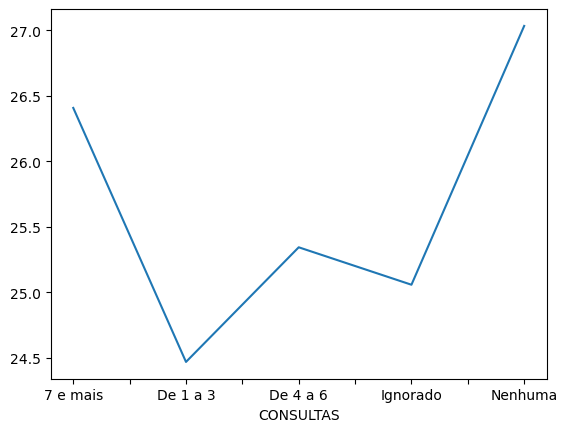

In [685]:
sinasc_1 = sinasc_1.reset_index()
sinasc_1 = sinasc_1.set_index('CONSULTAS')
sinasc_1.groupby(dicionario_consultas)['IDADEMAE'].mean().plot()

In [686]:
sinasc_1 = sinasc_1.reset_index()
sinasc_1 = sinasc_1.set_index('ESTCIVMAE')

<Axes: xlabel='ESTCIVMAE'>

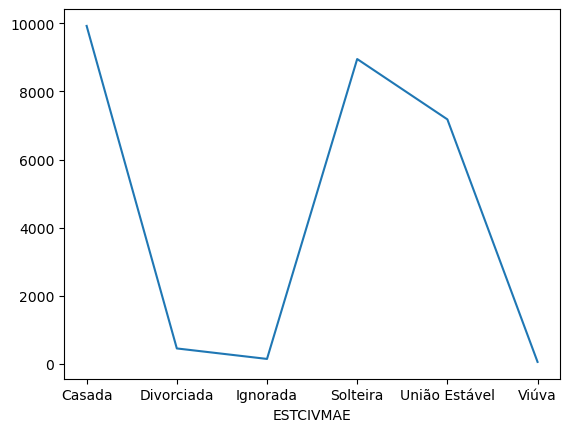

In [687]:
sinasc_1.groupby(dicionario_estado_civil)['CONSULTAS'].count().plot()

* Insight: Percebe-se que a quantidade de mulheres casadas é praticamente igual à de mulheres solteiras, mas as que estão em união estável acabam aparecendo em um número similar. Isso sugere que a maioria das mães nesse banco de dados está em algum tipo de relacionamento, seja como casada ou em união estável. Ao observarmos os dados mais de perto, vemos que a maioria das mulheres em união estável tem menos de 25 anos, enquanto as casadas tendem a ser um pouco mais velhas, com idades acima dos 28 anos, como podemos ver na plotagem abaixo

* Insight: Assim como aquelas que se encontram em união estável, as solteiras em sua grande maioria se encontram abaixo dos 25 anos.

<Axes: xlabel='ESTCIVMAE'>

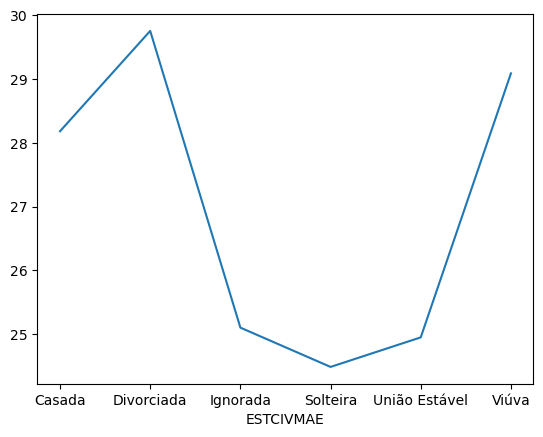

In [688]:
sinasc_1.groupby(dicionario_estado_civil)['IDADEMAE'].mean().plot()

In [689]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

<Axes: xlabel='PIB_MUNICIPIO'>

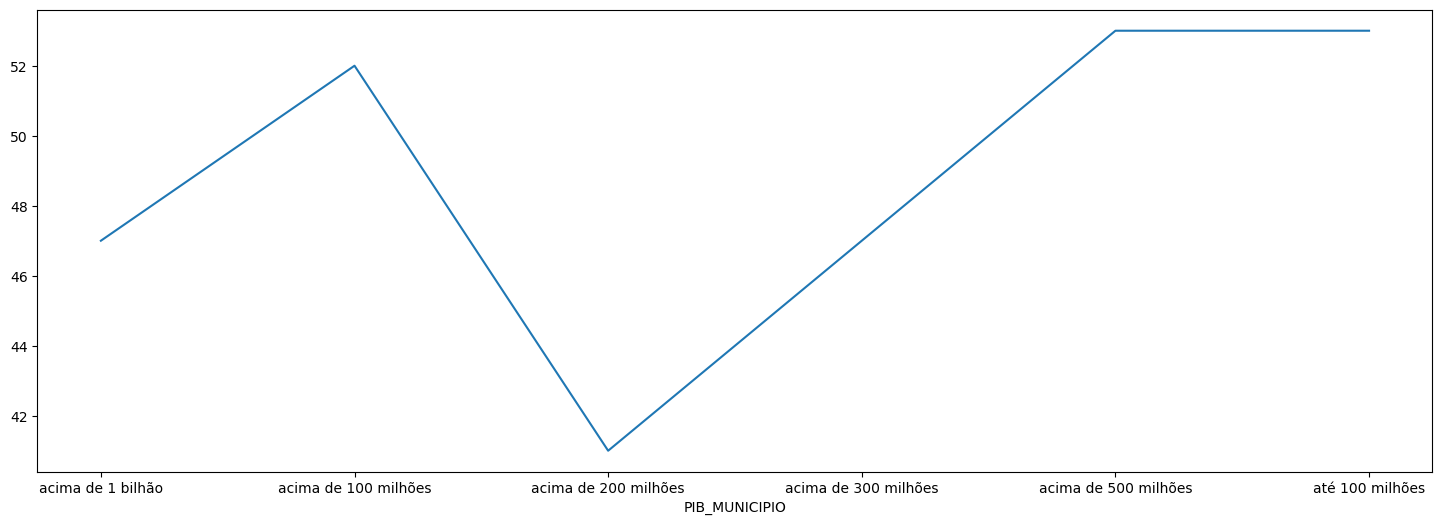

In [691]:
sinasc_1.groupby('PIB_MUNICIPIO')['IDADEMAE'].max().plot(figsize=[18,6])

<Axes: xlabel='PIB_MUNICIPIO'>

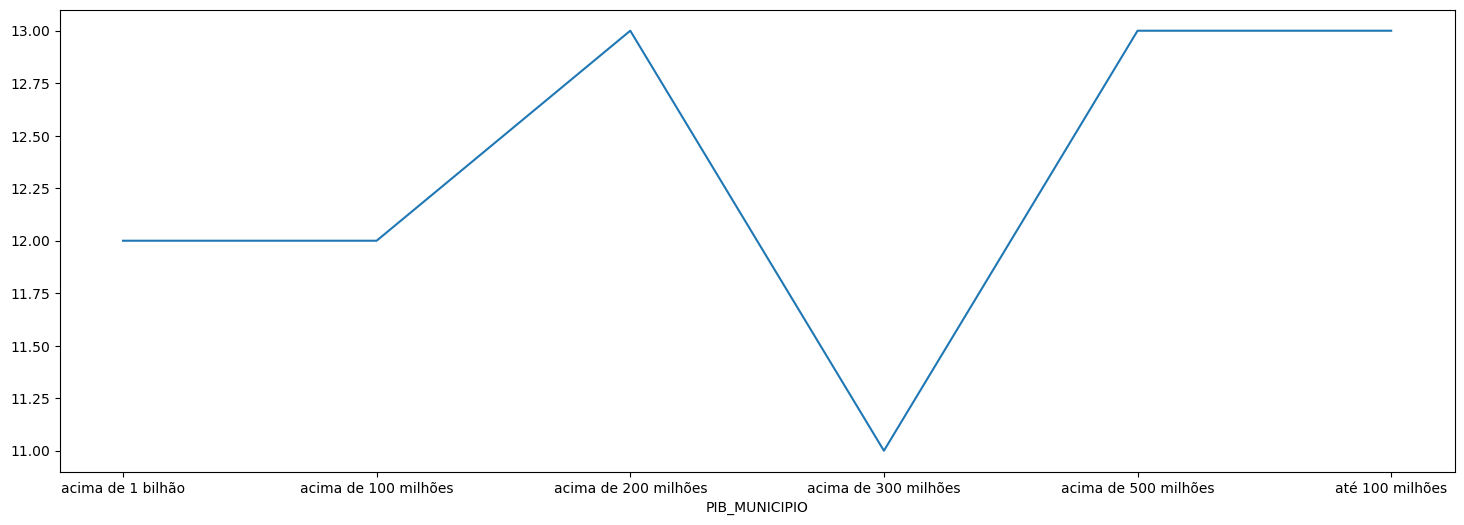

In [692]:
sinasc_1.groupby('PIB_MUNICIPIO')['IDADEMAE'].min().plot(figsize=[18,6])

<Axes: xlabel='PIB_MUNICIPIO'>

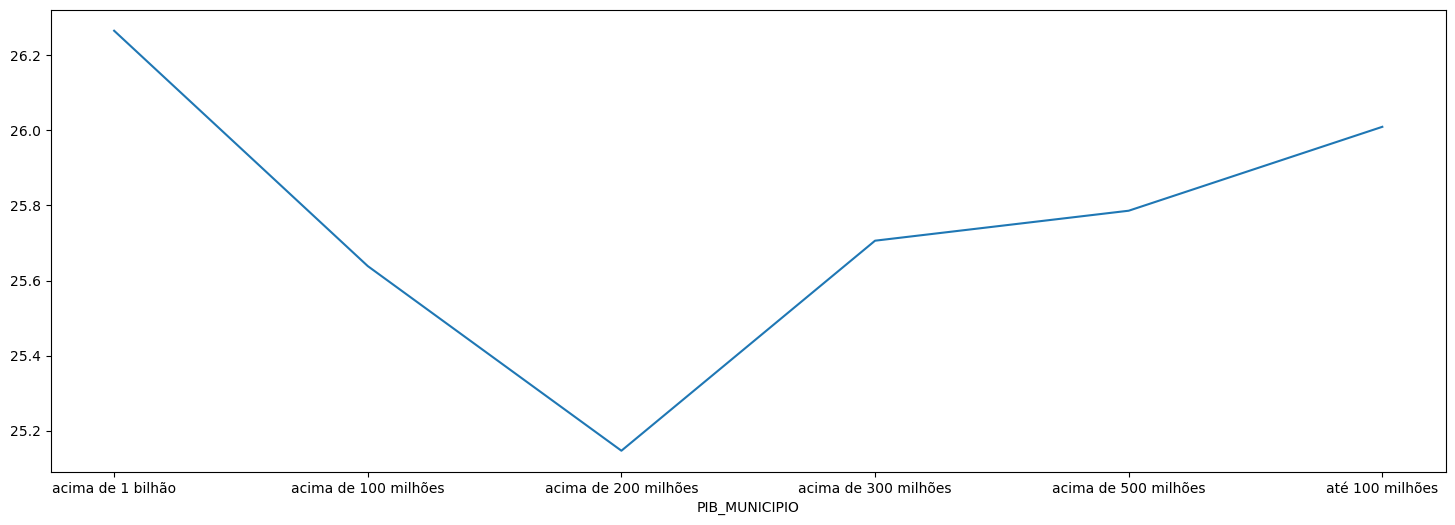

In [693]:
sinasc_1.groupby('PIB_MUNICIPIO')['IDADEMAE'].mean().plot(figsize=[18,6])

<Axes: xlabel='PIB_MUNICIPIO'>

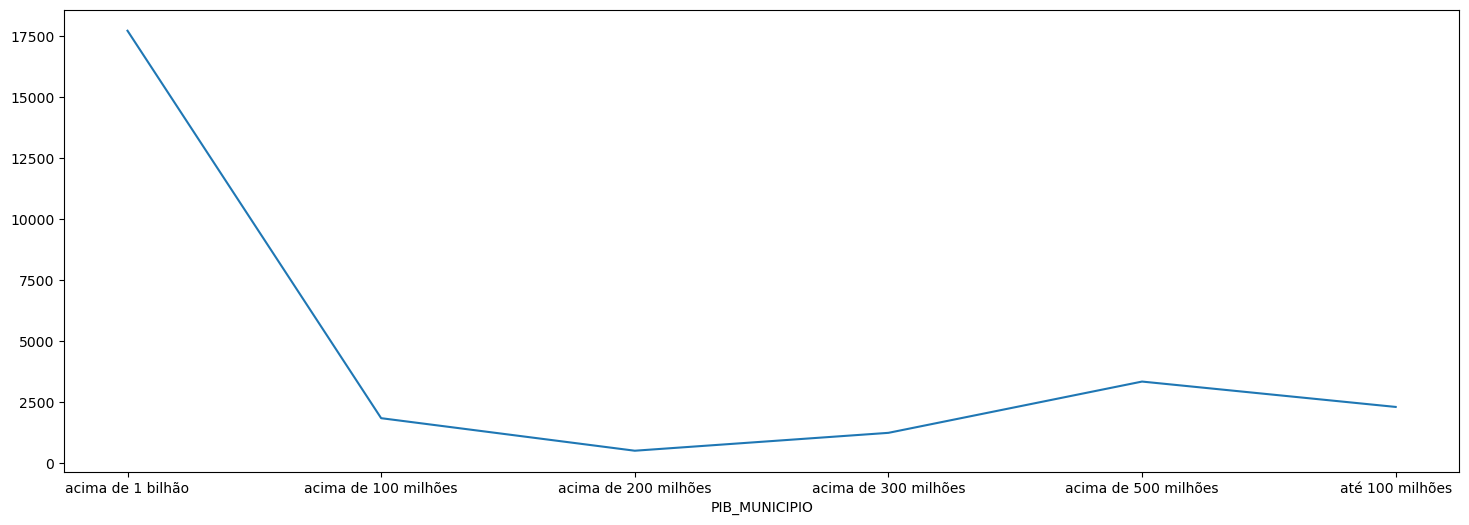

In [694]:
sinasc_1.groupby('PIB_MUNICIPIO')['IDADEMAE'].count().plot(figsize=[18,6])

* Insight: Percebe-se que nos municípios com menor PIB as mulheres que têm filhos costumam ser mais velhas. A média de idade atinge um pico nas cidades com maior produção econômica, enquanto nos lugares com PIB menor o número de nascimentos é mais baixo, mas a idade das mães pode ser bem elevada, chegando a picos acima dos 50 anos.